In [36]:
import xgboost as xgb
import numpy as np
import pandas as pd
import time

In [32]:
!wget -N https://gitlab.com/dzwietering/corona/-/raw/master/zzprogress.csv
!wget -N https://www.acaps.org/sites/acaps/files/resources/files/acaps_covid19_government_measures_dataset.xlsx

--2020-06-04 19:39:05--  https://gitlab.com/dzwietering/corona/-/raw/master/zzprogress.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘zzprogress.csv’

zzprogress.csv          [ <=>                ]  31.50K  --.-KB/s    in 0.01s   

Last-modified header missing -- time-stamps turned off.
2020-06-04 19:39:05 (2.39 MB/s) - ‘zzprogress.csv’ saved [32257]

--2020-06-04 19:39:06--  https://www.acaps.org/sites/acaps/files/resources/files/acaps_covid19_government_measures_dataset.xlsx
Resolving www.acaps.org (www.acaps.org)... 151.80.35.46
Connecting to www.acaps.org (www.acaps.org)|151.80.35.46|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2020-06-04 19:39:06 ERROR 404: Not Found.



In [40]:
df_prog = pd.read_csv('zzprogress.csv', parse_dates=[8, 9, 10])
df_prog

,iso2,cname,iso3,ccont,popdata,rsquared,progress,final,start,peak,floor,beta,mu,maxcur
0,AD,Andorra,AND,Europe,77006.0,0.955327,1.144845,637.141572,2020-03-18,2020-03-31,2020-05-15,6.149978,91.156126,439.684610
1,AE,United_Arab_Emirates,ARE,Asia,9630959.0,0.994398,0.666050,48669.864101,2020-03-22,2020-05-12,2020-09-25,25.670654,132.693121,9641.819054
2,AF,Afghanistan,AFG,Asia,37172386.0,0.994937,0.175031,74888.936321,2020-04-18,2020-06-25,2020-11-28,39.706238,176.920979,9664.442637
3,AG,Antigua_and_Barbuda,ATG,America,96286.0,0.983465,0.990206,23.660298,2020-03-23,2020-04-05,2020-05-02,7.927100,95.526361,13.604696
4,AL,Albania,ALB,Europe,2866376.0,0.993561,0.905945,1171.941731,2020-03-14,2020-04-16,2020-06-20,22.738032,107.286087,261.264417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,VG,British_Virgin_Islands,VGB,America,29802.0,0.960652,0.730127,8.217750,2020-03-28,2020-04-27,2020-06-20,22.522308,117.520926,1.848767
176,VI,United_States_Virgin_Islands,VIR,America,106977.0,0.966921,0.783359,48.873759,2020-03-17,2020-04-17,2020-06-18,20.170511,107.945431,12.230366
177,XK,Kosovo,XKX,Europe,1845300.0,0.992235,0.935607,1108.524566,2020-03-22,2020-04-18,2020-06-17,16.698912,109.349854,331.986753
178,ZA,South_Africa,ZAF,Africa,57779622.0,0.978311,0.035563,748449.237279,2020-04-05,2020-09-11,NaT,81.831457,254.968956,48963.953206


In [41]:
df_meas = pd.read_excel('acaps_covid19_government_measures_dataset.xlsx', sheet_name='Database')
df_meas

,ID,COUNTRY,ISO,ADMIN_LEVEL_NAME,PCODE,REGION,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,1,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
1,2,Afghanistan,AFG,Kabul,NaN,Asia,Introduction / extension of measures,Public health measures,Isolation and quarantine policies,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
2,3,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Awareness campaigns,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
3,4,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
4,5,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Social distancing,Limit public gatherings,No,Nevruz festival cancelled,NaN,2020-03-12,AA,Media,https://www.aa.com.tr/en/asia-pacific/coronavi...,2020-03-14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12337,11771,Zimbabwe,ZWE,NaN,NaN,Africa,Introduction / extension of measures,Lockdown,Partial lockdown,No,Partial lockdown (level 2) extended indefinite...,Not available,2020-05-17,Zimbabwe Government,Government,http://www.zim.gov.zw/index.php/en/news-room/l...,2020-05-25,https://zw.usembassy.gov/covid-19-information-2/
12338,11772,Zimbabwe,ZWE,NaN,NaN,Africa,Introduction / extension of measures,Public health measures,Requirement to wear protective gear in public,No,The government of Zimbabwe has officially made...,Arrest/Detention,2020-05-04,Africa News,Media,https://www.africanews.com/2020/05/10/zimbabwe...,2020-05-25,https://www.garda.com/crisis24/news-alerts/339...
12339,11773,Zimbabwe,ZWE,NaN,NaN,Africa,Introduction / extension of measures,Lockdown,Partial lockdown,No,Zimbabwe extends lockdown until May 15th,Not available,2020-05-04,Garda,Media,https://www.garda.com/crisis24/news-alerts/339...,2020-05-25,NaN
12340,11774,Zimbabwe,ZWE,NaN,NaN,Africa,Phase-out measure,Social distancing,Limit public gatherings,No,Outdoor exercises like walking or jogging or c...,Not applicable,2020-05-17,Zimbabwe Government,Government,http://www.zim.gov.zw/index.php/en/news-room/l...,2020-05-25,NaN


In [52]:
df_full = pd.merge(df_prog, df_meas, left_on='iso3', right_on='ISO')
df_full

,iso2,cname,iso3,ccont,popdata,rsquared,progress,final,start,peak,...,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,AE,United_Arab_Emirates,ARE,Asia,9630959.0,0.994398,0.666050,48669.864101,2020-03-22,2020-05-12,...,Visa restrictions,Yes,entry ban for travellers from Iran (no governm...,NaN,2020-01-02,Reuters,Media,https://www.reuters.com/article/us-healthcare-...,2020-03-16,NaN
1,AE,United_Arab_Emirates,ARE,Asia,9630959.0,0.994398,0.666050,48669.864101,2020-03-22,2020-05-12,...,Visa restrictions,No,suspension of visa issuance starting March 17,NaN,2020-03-17,NYT,Media,https://www.nytimes.com/reuters/2020/03/14/wor...,2020-03-16,NaN
2,AE,United_Arab_Emirates,ARE,Asia,9630959.0,0.994398,0.666050,48669.864101,2020-03-22,2020-05-12,...,International flights suspension,Yes,flights to and from Iran and China are suspend...,NaN,2020-03-17,Ministry of Foreign Affairs,Government,https://www.mofaic.gov.ae/en/mediahub/news/202...,2020-03-16,NaN
3,AE,United_Arab_Emirates,ARE,Asia,9630959.0,0.994398,0.666050,48669.864101,2020-03-22,2020-05-12,...,Health screenings in airports and border cross...,Yes,passengers arriving from China will undergo he...,NaN,2020-01-23,KhaleejTimes,Media,https://www.khaleejtimes.com/uae/dubai/china-c...,2020-03-16,NaN
4,AE,United_Arab_Emirates,ARE,Asia,9630959.0,0.994398,0.666050,48669.864101,2020-03-22,2020-05-12,...,Health screenings in airports and border cross...,No,health sreenings for all passengers arriving,NaN,2020-03-08,US Embassy,Government,https://ae.usembassy.gov/covid-19-information/,2020-03-16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10595,ZM,Zambia,ZMB,Africa,17351822.0,0.995188,1.085406,935.923468,2020-05-11,2020-05-17,...,Border closure,Yes,Nakonde Boarder to temporarily close tomorrow ...,Not applicable,2020-05-11,Ministry of Health,Social media,https://www.facebook.com/mohzambia/,2020-05-13,https://www.aa.com.tr/en/africa/covid-19-zambi...
10596,ZM,Zambia,ZMB,Africa,17351822.0,0.995188,1.085406,935.923468,2020-05-11,2020-05-17,...,Domestic travel restrictions,Yes,There will be a suspension of public road and ...,Not applicable,2020-05-11,Ministry of Health,Social media,https://www.facebook.com/mohzambia/,2020-05-13,https://www.aa.com.tr/en/africa/covid-19-zambi...
10597,ZM,Zambia,ZMB,Africa,17351822.0,0.995188,1.085406,935.923468,2020-05-11,2020-05-17,...,Border closure,Yes,Zambia reopened its Nakonde border with Tanzan...,Not applicable,2020-05-15,CGTN,Media,https://africa.cgtn.com/2020/05/15/zambia-reop...,2020-05-15,NaN
10598,ZM,Zambia,ZMB,Africa,17351822.0,0.995188,1.085406,935.923468,2020-05-11,2020-05-17,...,Schools closure,Yes,Zambia will begin opening schools on the 1st o...,Not applicable,2020-06-01,Ministry of Information,Social media,https://www.facebook.com/permalink.php?story_f...,2020-05-23,NaN


In [59]:
df_full['days'] = (df_full['DATE_IMPLEMENTED'] - df_full['start']).dt.days
df_full['days'].describe()

count    10070.000000
mean        16.670606
std         35.395747
min       -132.000000
25%         -6.000000
50%         15.000000
75%         44.000000
max        161.000000
Name: days, dtype: float64

In [61]:
df_aggr = df_full.pivot_table(index='iso2', columns='CATEGORY', values='days')
df_aggr

CATEGORY,Governance and socio-economic measures,Humanitarian exemption,Lockdown,Movement restrictions,Public health measures,Social distancing
iso2,,,,,,
AE,2.000000,NaN,14.500000,25.523810,-3.200000,24.375000
AF,-53.800000,NaN,-21.000000,-44.555556,-47.343750,-35.333333
AG,16.333333,NaN,32.142857,37.500000,-0.300000,5.625000
AL,9.733333,NaN,24.500000,20.200000,-6.416667,23.076923
AM,32.750000,NaN,33.500000,18.375000,19.000000,30.000000
...,...,...,...,...,...,...
UZ,NaN,NaN,NaN,-14.000000,NaN,NaN
VC,NaN,NaN,NaN,NaN,-0.222222,-6.000000
VE,-36.111111,NaN,-18.000000,-33.181818,-31.600000,-65.400000


In [64]:
df_final = pd.merge(df_prog, df_aggr, left_on='iso2', right_index=True)
df_final

,iso2,cname,iso3,ccont,popdata,rsquared,progress,final,start,peak,floor,beta,mu,maxcur,Governance and socio-economic measures,Humanitarian exemption,Lockdown,Movement restrictions,Public health measures,Social distancing
1,AE,United_Arab_Emirates,ARE,Asia,9630959.0,0.994398,0.666050,48669.864101,2020-03-22,2020-05-12,2020-09-25,25.670654,132.693121,9641.819054,2.000000,NaN,14.500000,25.523810,-3.200000,24.375000
2,AF,Afghanistan,AFG,Asia,37172386.0,0.994937,0.175031,74888.936321,2020-04-18,2020-06-25,2020-11-28,39.706238,176.920979,9664.442637,-53.800000,NaN,-21.000000,-44.555556,-47.343750,-35.333333
3,AG,Antigua_and_Barbuda,ATG,America,96286.0,0.983465,0.990206,23.660298,2020-03-23,2020-04-05,2020-05-02,7.927100,95.526361,13.604696,16.333333,NaN,32.142857,37.500000,-0.300000,5.625000
4,AL,Albania,ALB,Europe,2866376.0,0.993561,0.905945,1171.941731,2020-03-14,2020-04-16,2020-06-20,22.738032,107.286087,261.264417,9.733333,NaN,24.500000,20.200000,-6.416667,23.076923
5,AM,Armenia,ARM,Europe,2951776.0,0.971974,0.266875,30601.255293,2020-03-09,2020-06-23,2021-04-03,53.976786,175.273967,2916.644063,32.750000,NaN,33.500000,18.375000,19.000000,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,UZ,Uzbekistan,UZB,Asia,32955400.0,0.961278,0.940004,3646.034605,2020-04-08,2020-04-28,2020-05-28,19.629614,118.547484,936.266527,NaN,NaN,NaN,-14.000000,NaN,NaN
173,VC,Saint_Vincent_and_the_Grenadines,VCT,America,110210.0,0.913497,1.161390,18.450799,2020-03-24,2020-04-13,2020-05-19,15.636498,103.907525,5.878634,NaN,NaN,NaN,NaN,-0.222222,-6.000000
174,VE,Venezuela,VEN,America,28870195.0,0.997226,1.200132,1088.094324,2020-05-20,2020-05-25,2020-06-04,5.080584,146.432436,841.073032,-36.111111,NaN,-18.000000,-33.181818,-31.600000,-65.400000
178,ZA,South_Africa,ZAF,Africa,57779622.0,0.978311,0.035563,748449.237279,2020-04-05,2020-09-11,NaT,81.831457,254.968956,48963.953206,11.933333,NaN,19.500000,19.300000,19.947368,32.944444


In [65]:
df_final['mcpop'] = df_final['maxcur'] / df_final['popdata']
df_final['mcpop'].describe()

count    153.000000
mean       0.000536
std        0.001017
min        0.000013
25%        0.000055
50%        0.000153
75%        0.000672
max        0.008429
Name: mcpop, dtype: float64

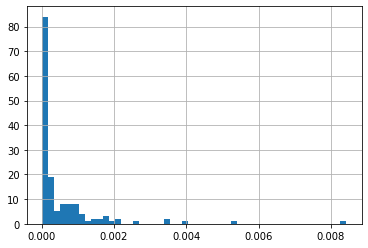

In [66]:
%matplotlib inline

df_final['mcpop'].hist(bins=50,)

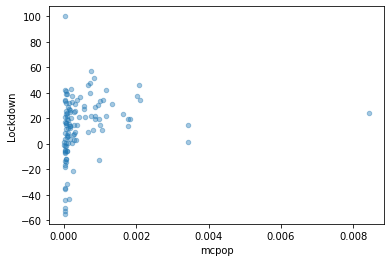

In [67]:
%matplotlib inline

df_final.plot(kind="scatter", x="mcpop", y="Lockdown", alpha=0.4)

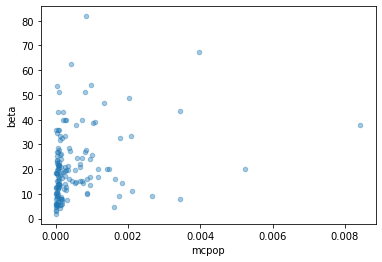

In [70]:
%matplotlib inline

df_final.plot(kind="scatter", x="mcpop", y="beta", alpha=.4)

In [76]:
from sklearn.model_selection import train_test_split, KFold

features = df_final.columns[14:19]

x_train, x_test, y_train, y_test = train_test_split(df_final[features], df_final["mcpop"])

In [101]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test)

params = {
    'objective' : 'reg:squarederror',
    #'tree_method':'hist',
    'min_child_weight' : 1,
    'eta' : 0.1,
    'seed' : 0,
    'gamma':0,
    'max_depth': 3,
    # 'colsample_bytree': 0.7,
    # 'subsample':0.7,
}

hist = xgb.cv(params, dtrain, nfold=10, as_pandas=True, num_boost_round=100, verbose_eval=10, early_stopping_rounds=1000, show_stdv=True, seed=0)

[0]	train-rmse:0.44996+0.00003	test-rmse:0.44997+0.00028
[10]	train-rmse:0.15859+0.00001	test-rmse:0.15859+0.00030
[20]	train-rmse:0.05590+0.00001	test-rmse:0.05590+0.00030
[30]	train-rmse:0.01973+0.00001	test-rmse:0.01973+0.00028
[40]	train-rmse:0.00703+0.00001	test-rmse:0.00703+0.00022
[50]	train-rmse:0.00259+0.00001	test-rmse:0.00268+0.00018
[60]	train-rmse:0.00106+0.00002	test-rmse:0.00133+0.00040
[70]	train-rmse:0.00063+0.00002	test-rmse:0.00101+0.00053
[80]	train-rmse:0.00055+0.00003	test-rmse:0.00095+0.00058
[90]	train-rmse:0.00054+0.00003	test-rmse:0.00093+0.00060
[99]	train-rmse:0.00054+0.00003	test-rmse:0.00093+0.00060


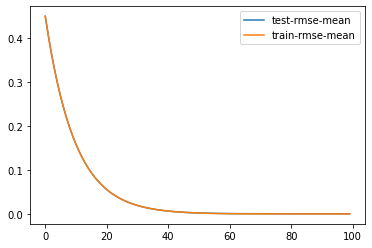

In [102]:
hist.plot(y=["test-rmse-mean", "train-rmse-mean"])

In [103]:
## xgboost on training data
bst = xgb.train(params, dtrain, num_boost_round=100, verbose_eval=10)

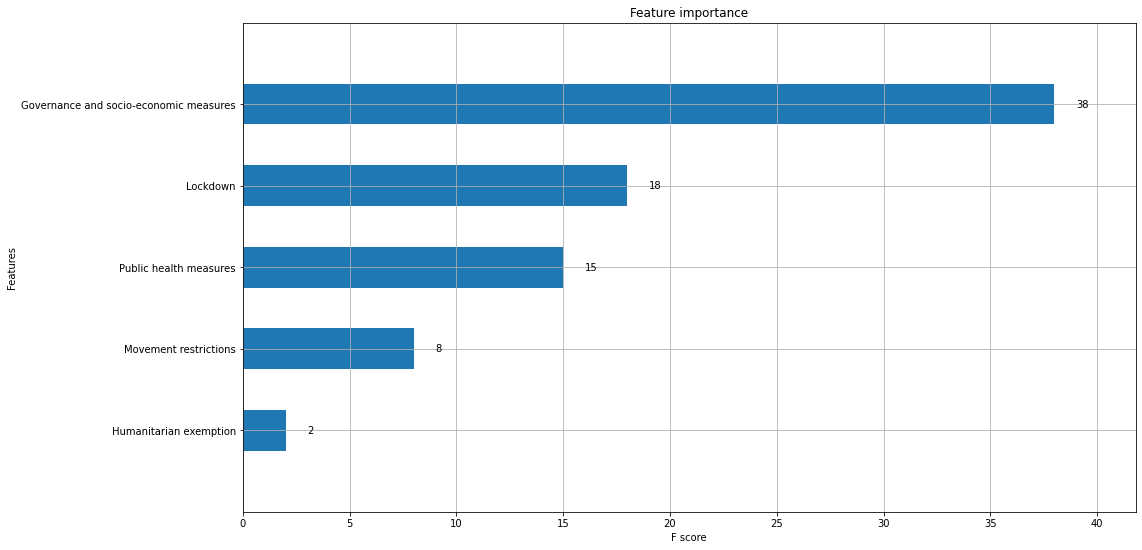

In [104]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 9))

xgb.plot_importance(bst, ax=ax, height=0.5)